In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [10]:
{-# LANGUAGE FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude
import Diagrams.TwoD.Layout.Grid

One way to define the [Heighway dragon](https://en.wikipedia.org/wiki/Dragon_curve) is iteratively. If we have a dragon of a certain level of detail, we can create the next, more detailed, dragon as follows: Take two copies of the previous dragon, rotate them, invert one of them, scale them, and stick them together.



In [4]:
nextDragon trail = (trail # rotateBy (-1/8) 
                    <> trail # rotateBy (5/8) # reverseTrail) 
                   # scale (1/sqrt 2)

With this, we can now generate an infinite sequence of increasingly detailed dragon curves, starting with a straight line.



In [11]:
dragonCurves = map (trailLike . (`at` origin)) (iterate nextDragon initialTrail)
  where
    initialTrail = hrule 1

The above is enough to generate a Heighway dragon of arbitrary level of detail, but let's go a little further to show the relation of successive curves in the sequence.

`withPrevious` combines each diagram in a list with a shadow of the previous one.



In [7]:
withPrevious diagrams = zipWith (<>) diagrams (mempty : diagrams # opacity 0.2)


We remember the order of the diagrams by giving them names, so that we can lay them out and then show the order with arrows.



In [8]:
rememberOrder :: [Diagram B] -> [Diagram B]
rememberOrder = zipWith named [0::Int ..]

showOrder :: Diagram B -> Diagram B
showOrder diagram 
  = diagram # applyAll (map addArrow [0 .. length (names diagram)])
  where
    addArrow n = connectOutside' opts n (n + 1)
    opts = with & gaps .~ normalized 0.005 
                & headLength .~ tiny


Finally, we put all of the above together, with some layout tricks to make the diagrams and arrows align properly. `gridSnake` lays out the diagrams in a "snaking" grid, so that each diagram is adjacent to the previous one.



In [12]:
example = dragonCurves # withPrevious 
                       # take 12
                       # sameBoundingRect
                       # rememberOrder 
                       # map (frame 0.1) 
                       # gridSnake
                       # showOrder 
                       # lw ultraThin

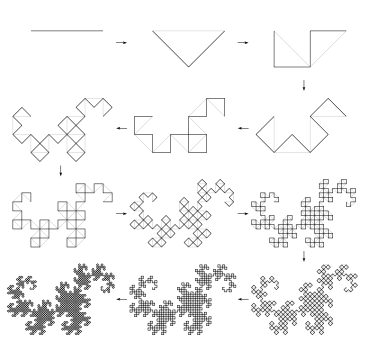

In [13]:
example